In [138]:
%load_ext autoreload
%autoreload 2

import warnings
import collections
import time
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import joblib as jl
from sklearn import datasets
import pandas as pd

from sklearn.linear_model import ARDRegression
from src.ulnml.least_square_regression import RidgeULNML
from src.util.plotting import rmse, logloss, run_and_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
memory = jl.Memory(cachedir="tmp-real", verbose=False)
# memory.clear(warn=False)

In [140]:
def load_million_songs_dataset_proper():
    X, y = load_million_songs_dataset()
    train = 463715
    test = 51630
    X_train, y_train = X[:train], y[:train]
    X_test, y_test = X[test:], y[test:]
    return X_train, y_train, X_test, y_test

@memory.cache
def load_residential_building_dataset_original():
    rbd = pd.read_excel("asset/Residential-Building-Data-Set.xlsx", header=[0, 1], index_col=[0, 1, 2, 3])
    Xyy = rbd.values
    return Xyy[:, :-2], Xyy[:, -2:]


@memory.cache
def load_million_songs_dataset():
    msd = pd.read_csv("asset/YearPredictionMSD.txt", index_col=0, header=None)
    y = np.array(msd.index)
    X = msd.values
    return X, y

def load_residential_building_dataset0():
    X, yy = load_residential_building_dataset_original()
    return X, yy[:, 0]

def load_residential_building_dataset1():
    X, yy = load_residential_building_dataset_original()
    return X, yy[:, 1]

def load_boston():
    return datasets.load_boston(return_X_y=True)

def load_diabetes():
    return datasets.load_diabetes(return_X_y=True)


# Log-loss

running ridge+CV ..
running lasso+CV ..
running RandomSearch ..
running RVM ..
running MDL-RS ..


(515345, 90)

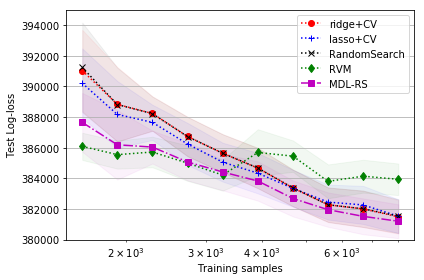

In [141]:
X, y = load_million_songs_dataset()
run_and_plot(X, y, "Test Log-loss", logloss)
fig = plt.gcf()
# save whole picture
fig.savefig("result/MSD-whole.pdf")
# save detailed one
ax, = fig.get_axes()
ax.set_ylim(380000, 395000)
fig.savefig("result/MSD-detail.pdf")
X.shape

running ridge+CV ..
running lasso+CV ..
running RandomSearch ..
running RVM ..
running MDL-RS ..


(372, 103)

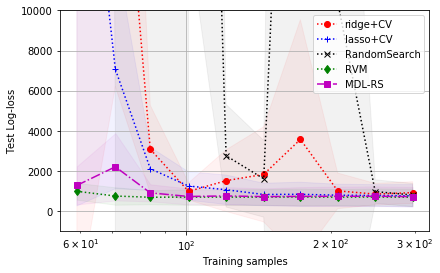

In [142]:
X, y = load_residential_building_dataset0()
run_and_plot(X, y, "Test Log-loss", logloss)
fig = plt.gcf()
fig.savefig("result/RBD0-whole.pdf") # save whole picture

ax, = fig.get_axes()
ax.set_ylim(-1000, 10000)
fig.savefig("result/RBD0-detail.pdf") # save detailed one
X.shape

running ridge+CV ..
running lasso+CV ..
running RandomSearch ..
running RVM ..
running MDL-RS ..


(372, 103)

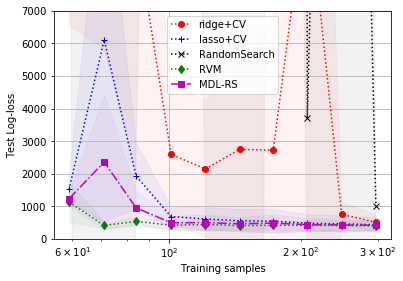

In [151]:
X, y = load_residential_building_dataset1()
run_and_plot(X, y, "Test Log-loss", logloss)
fig = plt.gcf()
fig.savefig("result/RBD1-whole.pdf") # save whole picture

ax, = fig.get_axes()
ax.set_ylim(0, 7000)
fig.savefig("result/RBD1-detail.pdf") # save detailed one
X.shape

running ridge+CV ..
running lasso+CV ..
running RandomSearch ..
running RVM ..
running MDL-RS ..


(506, 13)

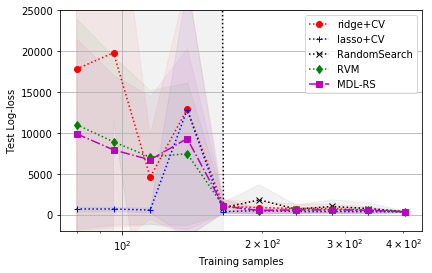

In [150]:
X, y = load_boston()
run_and_plot(X, y, "Test Log-loss", logloss)
fig = plt.gcf()
fig.savefig("result/Boston-whole.pdf") # save whole picture

ax, = fig.get_axes()
ax.set_ylim(-2000, 25000)
fig.savefig("result/Boston-detail.pdf") # save detailed one
X.shape

running ridge+CV ..
running lasso+CV ..
running RandomSearch ..
running RVM ..
running MDL-RS ..


(442, 10)

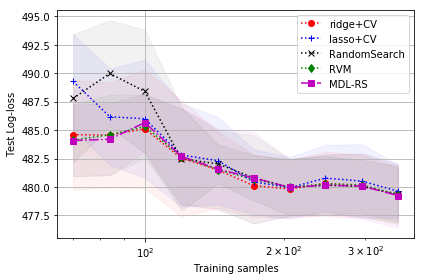

In [149]:
X, y = load_diabetes()
run_and_plot(X, y, "Test Log-loss", logloss)
fig = plt.gcf()
fig.savefig("result/Diabetes-whole.pdf") # save whole picture

ax, = fig.get_axes()
# ax.set_ylim(470, 510)
fig.savefig("result/Diabetes-detail.pdf") # save detailed one
X.shape

# RMSE

running ridge+CV ..
running lasso+CV ..
running RandomSearch ..
running RVM ..
running MDL-RS ..


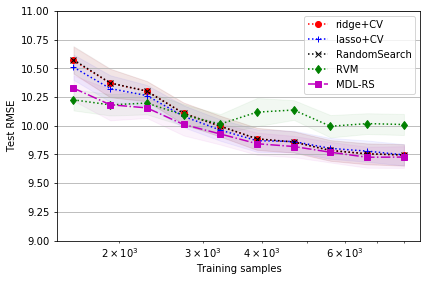

In [127]:
X, y = load_million_songs_dataset()
run_and_plot(X, y, "Test RMSE", rmse)
fig = plt.gcf()
# save whole picture
fig.savefig("result/MSD-whole-rmse.pdf")
# save detailed one
ax, = fig.get_axes()
ax.set_ylim(9, 11)
fig.savefig("result/MSD-detail-rmse.pdf")

running ridge+CV ..
running lasso+CV ..
running RandomSearch ..
running RVM ..
running MDL-RS ..


(372, 103)

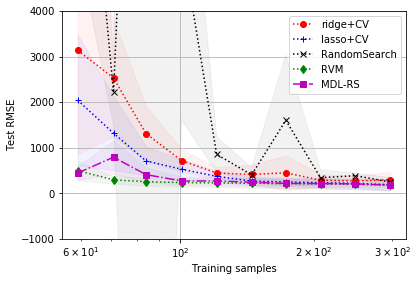

In [128]:
X, y = load_residential_building_dataset0()
run_and_plot(X, y, "Test RMSE", rmse)
fig = plt.gcf()
fig.savefig("result/RBD0-whole-rmse.pdf") # save whole picture

ax, = fig.get_axes()
ax.set_ylim(-1000, 4000)
fig.savefig("result/RBD0-detail-rmse.pdf") # save detailed one
X.shape

running ridge+CV ..
running lasso+CV ..
running RandomSearch ..
running RVM ..
running MDL-RS ..


(372, 103)

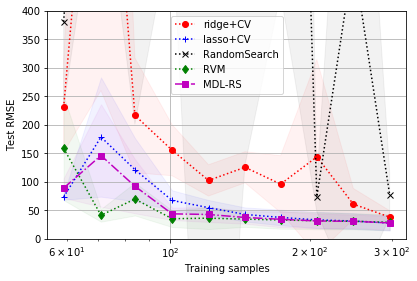

In [132]:
X, y = load_residential_building_dataset1()
run_and_plot(X, y, "Test RMSE", rmse)
fig = plt.gcf()
fig.savefig("result/RBD1-whole-rmse.pdf") # save whole picture

ax, = fig.get_axes()
ax.set_ylim(0, 400)
fig.savefig("result/RBD1-detail-rmse.pdf") # save detailed one
X.shape

running ridge+CV ..
running lasso+CV ..
running RandomSearch ..
running RVM ..
running MDL-RS ..


(506, 13)

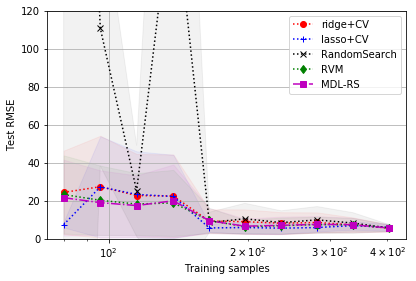

In [135]:
X, y = load_boston()
run_and_plot(X, y, "Test RMSE", rmse)
fig = plt.gcf()
fig.savefig("result/Boston-whole-rmse.pdf") # save whole picture

ax, = fig.get_axes()
ax.set_ylim(0, 120)
fig.savefig("result/Boston-detail-rmse.pdf") # save detailed one
X.shape

running ridge+CV ..
running lasso+CV ..
running RandomSearch ..
running RVM ..
running MDL-RS ..


(442, 10)

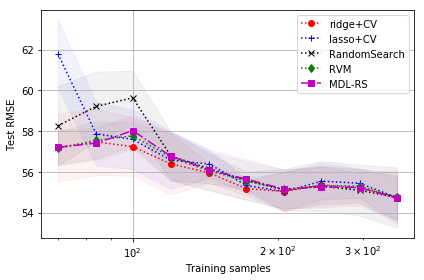

In [136]:
X, y = load_diabetes()
run_and_plot(X, y, "Test RMSE", rmse)
fig = plt.gcf()
fig.savefig("result/Diabetes-whole-rmse.pdf") # save whole picture

ax, = fig.get_axes()
# ax.set_ylim(470, 510)
fig.savefig("result/Diabetes-detail-rmse.pdf") # save detailed one
X.shape